*Eduardus Tjitrahardja | @edutjie | 2022*

# Data Sprint 83 - Underwater Caddy Gesture Recognition

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

SEED = 10

In [2]:
plt.style.use('seaborn')

## Loading Dataset

In [3]:
train_label = pd.read_csv('data/Training_set.csv')
train_label.head()

,filename,label
0,Image_1.jpg,genova-A
1,Image_2.jpg,brodarski-B
2,Image_3.jpg,genova-A
3,Image_4.jpg,genova-A
4,Image_5.jpg,biograd-A


In [4]:
train_label['paths'] = 'data/train/' + train_label['filename']
train_label.head()

,filename,label,paths
0,Image_1.jpg,genova-A,data/train/Image_1.jpg
1,Image_2.jpg,brodarski-B,data/train/Image_2.jpg
2,Image_3.jpg,genova-A,data/train/Image_3.jpg
3,Image_4.jpg,genova-A,data/train/Image_4.jpg
4,Image_5.jpg,biograd-A,data/train/Image_5.jpg


## Inspecting Data

In [79]:
train_label.shape

(12934, 3)

In [77]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12934 entries, 0 to 12933
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12934 non-null  object
 1   label     12934 non-null  object
 2   paths     12934 non-null  object
dtypes: object(3)
memory usage: 303.3+ KB


In [80]:
train_label.isnull().any()

filename    False
label       False
paths       False
dtype: bool

In [81]:
train_label.label.unique()

array(['genova-A', 'brodarski-B', 'biograd-A', 'biograd-C', 'brodarski-C',
       'biograd-B', 'brodarski-A', 'brodarski-D'], dtype=object)

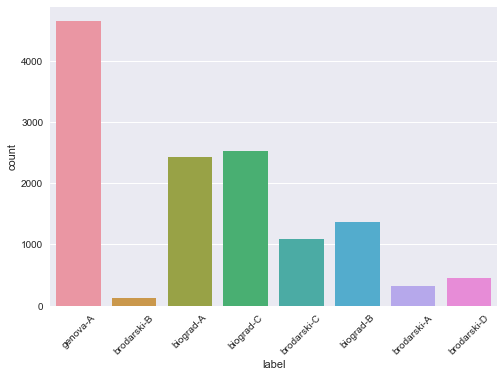

In [82]:
sns.countplot(x='label', data=train_label)
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [6]:
le = LabelEncoder()

In [7]:
train_label['label'] = le.fit_transform(train_label['label'])
train_label.label.unique()

array([7, 4, 0, 2, 5, 1, 3, 6])

### Process Image

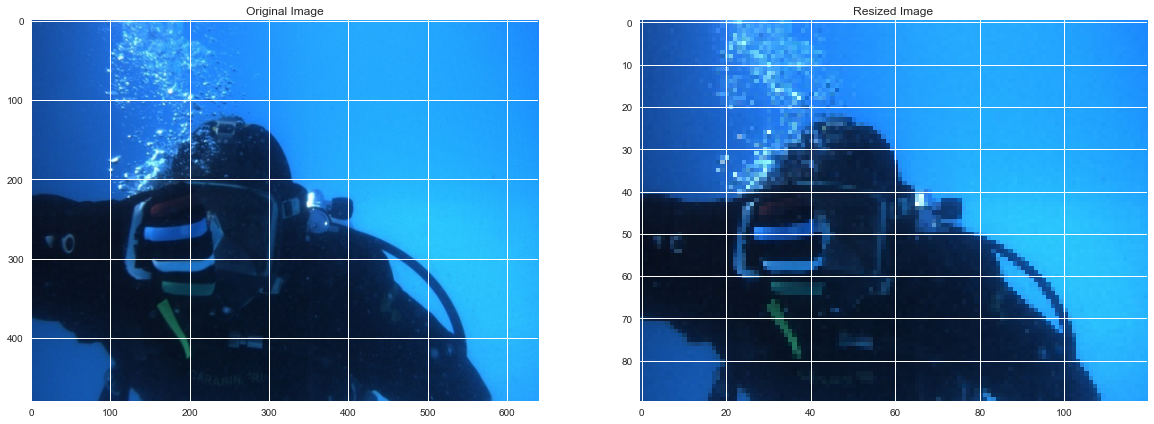

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
img = cv2.imread("data/test/Image_1.jpg")
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
ax[0].set_title('Original Image')

img = cv2.resize(img, (120, 90))
ax[1].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
ax[1].set_title('Resized Image')
plt.show()

In [8]:
data = []

for row in train_label.itertuples():
    # read image as grayscale
    img = cv2.imread(row.paths, cv2.IMREAD_GRAYSCALE)
    
    # resize image to 120x90
    img = cv2.resize(img, (120, 90))
    
    data.append([img, row.label])

data

[[array([[ 69,  70,  71, ...,  84,  81,  81],
         [ 71,  73,  73, ...,  85,  83,  80],
         [ 69,  71,  73, ...,  85,  83,  83],
         ...,
         [ 35,  40,  43, ..., 102, 102,  99],
         [ 40,  41,  41, ..., 103, 102,  99],
         [ 41,  40,  44, ..., 100,  99,  98]], dtype=uint8),
  7],
 [array([[ 63,  69,  65, ...,  89,  90,  89],
         [ 62,  68,  68, ...,  85,  94,  88],
         [ 69,  66,  70, ...,  87,  95,  88],
         ...,
         [112, 117, 115, ...,  93,  99,  95],
         [120, 115, 117, ...,  97,  93,  91],
         [126, 125, 126, ..., 103,  98,  91]], dtype=uint8),
  4],
 [array([[ 72,  75,  74, ...,  88,  86,  84],
         [ 72,  75,  75, ...,  87,  86,  85],
         [ 72,  74,  76, ...,  87,  84,  85],
         ...,
         [ 58,  59,  59, ..., 115, 115, 114],
         [ 60,  60,  62, ..., 113, 112, 111],
         [ 62,  61,  61, ..., 114, 111, 111]], dtype=uint8),
  7],
 [array([[ 60,  60,  62, ...,  98,  97,  94],
         [ 61,  63,  

In [9]:
train_data = pd.DataFrame(data, columns=['image', 'label'])
train_data.head()

,image,label
0,"[[69, 70, 71, 75, 75, 76, 75, 77, 78, 79, 81, ...",7
1,"[[63, 69, 65, 72, 71, 74, 66, 71, 80, 71, 75, ...",4
2,"[[72, 75, 74, 80, 78, 79, 82, 83, 87, 87, 88, ...",7
3,"[[60, 60, 62, 66, 66, 66, 64, 69, 70, 69, 69, ...",7
4,"[[125, 128, 129, 128, 133, 135, 135, 136, 130,...",0


In [10]:
train_data.shape

(12934, 2)

## Preparing Data For Training

In [40]:
X = np.asarray(train_data.image.to_list())
y = train_data.label.values

X.shape, y.shape

((12934, 90, 120), (12934,))

In [41]:
X = X.reshape(-1, 120, 90, 1)
X.shape

(12934, 120, 90, 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10347, 120, 90, 1), (2587, 120, 90, 1), (10347,), (2587,))

## Training Model

In [45]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(120, 90, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [46]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
324/324 [==============================] - 4s 12ms/step - loss: 7.3513 - accuracy: 0.8591
Epoch 2/10
324/324 [==============================] - 4s 12ms/step - loss: 0.0697 - accuracy: 0.9822
Epoch 3/10
324/324 [==============================] - 4s 13ms/step - loss: 0.0906 - accuracy: 0.9763
Epoch 4/10
324/324 [==============================] - 4s 13ms/step - loss: 0.0565 - accuracy: 0.9847
Epoch 5/10
324/324 [==============================] - 4s 13ms/step - loss: 0.0519 - accuracy: 0.9871
Epoch 6/10
324/324 [==============================] - 4s 13ms/step - loss: 0.0407 - accuracy: 0.9897
Epoch 7/10
324/324 [==============================] - 4s 13ms/step - loss: 0.0286 - accuracy: 0.9940
Epoch 8/10
324/324 [==============================] - 4s 14ms/step - loss: 0.0431 - accuracy: 0.9914
Epoch 9/10
324/324 [==============================] - 5s 14ms/step - loss: 0.0171 - accuracy: 0.9958
Epoch 10/10
324/324 [==============================] - 5s 14ms/step - loss: 0.0205 - accura

## Validate Model

In [48]:
cnn.evaluate(X_test, y_test)

81/81 [==============================] - 1s 7ms/step - loss: 0.0444 - accuracy: 0.9946


[0.04443679749965668, 0.994588315486908]

## Preparing Test Data

In [50]:
test_label = pd.read_csv('data/Testing_set.csv')
test_label.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [51]:
test_label['paths'] = 'data/test/' + test_label['filename']
test_label.head()

,filename,paths
0,Image_1.jpg,data/test/Image_1.jpg
1,Image_2.jpg,data/test/Image_2.jpg
2,Image_3.jpg,data/test/Image_3.jpg
3,Image_4.jpg,data/test/Image_4.jpg
4,Image_5.jpg,data/test/Image_5.jpg


In [67]:
test_images = []

for row in test_label.itertuples():
    # read image as grayscale
    img = cv2.imread(row.paths, cv2.IMREAD_GRAYSCALE)
    
    # resize image to 120x90
    img = cv2.resize(img, (120, 90))
    
    test_images.append(img)
    
test_images

[array([[ 71,  72,  73, ..., 119, 118, 117],
        [ 70,  71,  72, ..., 120, 118, 118],
        [ 67,  71,  74, ..., 120, 119, 117],
        ...,
        [ 68,  68,  70, ..., 139, 137, 136],
        [ 67,  68,  69, ..., 139, 136, 136],
        [ 67,  67,  70, ..., 135, 134, 134]], dtype=uint8),
 array([[72, 71, 74, ..., 75, 74, 75],
        [72, 72, 74, ..., 76, 75, 74],
        [70, 71, 75, ..., 77, 74, 74],
        ...,
        [96, 96, 95, ..., 96, 95, 92],
        [95, 95, 99, ..., 96, 94, 94],
        [93, 96, 94, ..., 95, 94, 94]], dtype=uint8),
 array([[107, 111, 113, ...,  89,  89,  86],
        [109, 110, 111, ...,  88,  86,  83],
        [110, 109, 112, ...,  95,  86,  89],
        ...,
        [ 62,  63,  64, ...,  63,  64,  65],
        [ 61,  66,  65, ...,  62,  60,  59],
        [ 62,  61,  68, ...,  63,  63,  63]], dtype=uint8),
 array([[ 86,  79,  85, ...,  61,  62,  63],
        [ 89,  81,  87, ...,  70,  67,  64],
        [ 84,  86,  89, ...,  71,  65,  69],
       

In [68]:
test_images = np.asarray(test_images)
print("Before Reshaped:", test_images.shape)
test_images = test_images.reshape(-1, 120, 90, 1)
print("After Reshaped:", test_images.shape)

Before Reshaped: (5544, 90, 120)
After Reshaped: (5544, 120, 90, 1)


## Predicting Test Data

In [69]:
pred = cnn.predict(test_images)
pred[0]

174/174 [==============================] - 1s 5ms/step


array([0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [70]:
pred[0].argmax()

7

In [71]:
preds = pred.argmax(axis=1)
preds

array([7, 7, 0, ..., 2, 7, 1], dtype=int64)

In [72]:
preds = le.inverse_transform(preds)
preds

array(['genova-A', 'genova-A', 'biograd-A', ..., 'biograd-C', 'genova-A',
       'biograd-B'], dtype=object)

## Make Submission

In [74]:
submission = pd.DataFrame({"filename": test_label['filename'], "label": preds})
submission.head()

,filename,label
0,Image_1.jpg,genova-A
1,Image_2.jpg,genova-A
2,Image_3.jpg,biograd-A
3,Image_4.jpg,brodarski-C
4,Image_5.jpg,biograd-A


In [76]:
submission.to_csv("submissions/submission.csv", index=False)